*Daniela Lancheros*

*Juana Valeria Pinzón*



# ***Taller*** ***3***

# *1.*

$$
m \vec{a}=-m \vec{g}+\vec{N}-\gamma\|\vec{v}\|^{2} \hat{v}
$$

In [152]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from scipy.integrate import solve_ivp
from matplotlib.animation import FFMpegWriter
plt.rcParams["axes.labelsize"] = 15
plt.rcParams["figure.figsize"] = (14,5)
plt.rcParams["animation.html"] = "jshtml"
plt.rcParams['animation.embed_limit'] = 10000.0

In [28]:
g=9.8 #Gravedad (m/s^2)
theta=np.radians(30)
m=10e-3 ##Masa carros en kg
v_0=0
H=0 ## altura incial (m)
gamma=0.7 ## coeficiente de friccion (Kg/m)

$$
 \frac{dv}{dt}=g\sin{θ}-\frac{\gamma}{m_{total}}\|\vec{v}\|^{2}
$$

In [29]:
def ecuacion_movimiento(t,Y,gamma,masa):
  x,v=Y
  return ([v,g*np.sin(theta)-((gamma*(abs(v)**2))/masa)])


In [30]:
def y_cero(t,y,gamma,masa):
  return y[0]-30
y_cero.terminal=True
y_cero.direction=1

In [31]:
def masas_variables(masa_carros,masas):
  t_caida=np.array([])
  solucion=[]
  for M in masas:
    m_total=m+M
    sol=solve_ivp(ecuacion_movimiento,y0=np.array([H,v_0]),t_span=(0,100),args=[gamma,m_total],max_step=0.1,events=[y_cero])
    solucion.append(sol.y[0])
    tiempo_caida=sol.t[-1]
    t_caida=np.append(tiempo_caida,t_caida)

  return t_caida,solucion

In [32]:
masas=np.linspace(0.2,1,100)
tiempos_caidas,soluciones=masas_variables(m,masas)

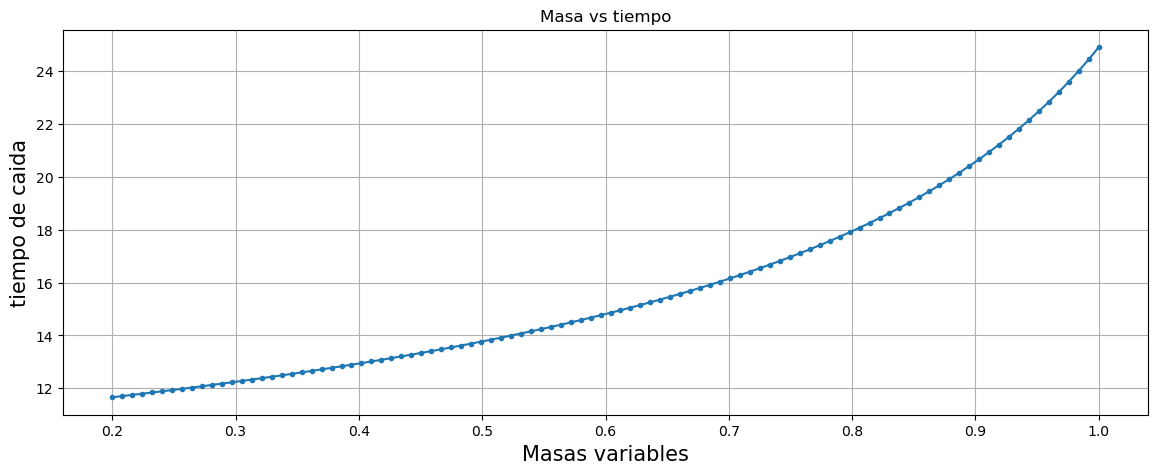

In [33]:
plt.plot(masas,tiempos_caidas,".-")
plt.ylabel('tiempo de caida')
plt.xlabel('Masas variables')
plt.title('Masa vs tiempo')
plt.grid()

Como se muestra en la gráfica anterior, el tiempo de caída de cada carro está directamente relacionado con la masa que transporta. Se observa una relación exponencial entre la masa y el tiempo de caída de cada carro, de manera que, al incrementar la masa, el tiempo de caída aumenta exponencialmente

## 2) Comprobación observacional de la relatividad general

In [147]:
mu = 39.4234021
a= 0.38709893
e = 0.20563069

x_cero = a * (1 + e)
y_cero = 0
vx_cero = 0
vy_cero = np.sqrt(mu / a * (1 - e) / (1 + e))
alpha = 1.09778201e-2

In [148]:
def orbita_mercurio(t, y,alpha):
  x, y, vx, vy = y
  r = np.linalg.norm([x,y])
  return [vx, vy, -mu * x  / r**3 * (1 + alpha / r**2), -mu * y  / r**3 * (1 + alpha / r**2)]


In [149]:
sol =solve_ivp(orbita_mercurio, t_span=(0.,10.), y0=[x_cero,y_cero,vx_cero,vy_cero], method='RK45',args=[alpha], max_step=1e-2,rtol=1e-9,atol=1e-12)

### 2.1) Simular

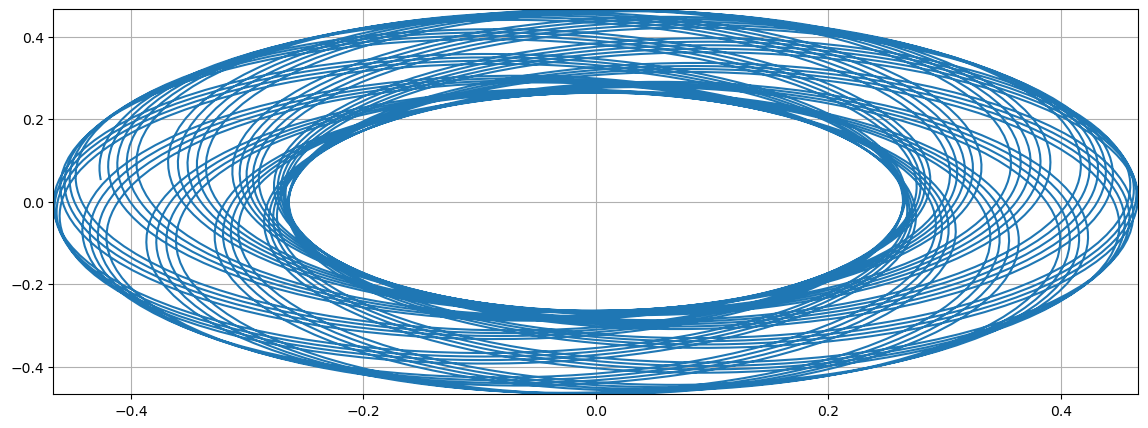

In [158]:
t_d= np.linspace(sol.t[0],sol.t[-1],300)
Y=sol.y
td=len(sol.t)
x_mercurio,y_mercurio=Y[0],Y[1]
fig = plt.figure();
plt.xlim(x_mercurio.min(),x_mercurio.max())
plt.ylim(y_mercurio.min(),y_mercurio.max())
plt.grid()

line = plt.plot(*Y[:2])[0]
def func(frame):
    #point.set_offsets(Y[:2,frame])
    if frame>1:
        line.set_data(x_mercurio[:frame+1],y_mercurio[:frame+1])
    return line,
anim = animation.FuncAnimation(fig,func,frames=range(td),interval=10)

In [157]:
anim.save('animacion orbita mercurio.mp4', writer='ffmpeg', fps=30)

python(18457) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


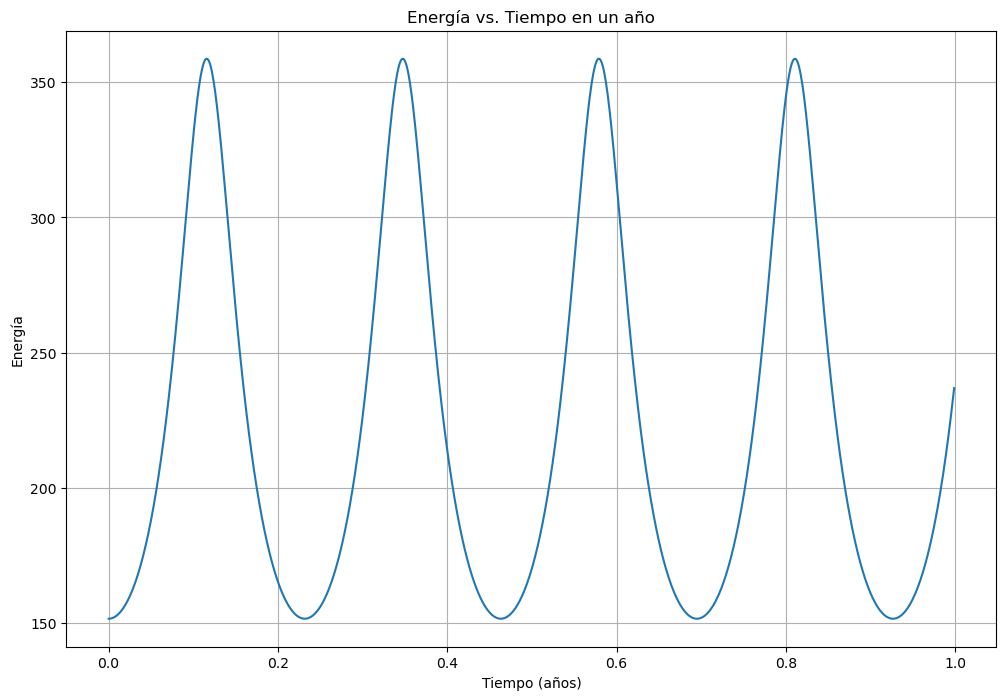

In [20]:
r= np.sqrt(sol.y[0]**2+sol.y[1]**2)
v2 = sol.y[2]**2 + sol.y[3]**2
energia=v2+(mu/r)

t_un_año=np.argmin(np.abs(sol.t-1))

plt.figure(figsize=(12, 8))
plt.plot(sol.t[:t_un_año], energia[:t_un_año])
plt.title('Energía vs. Tiempo en un año')
plt.xlabel('Tiempo (años)')
plt.ylabel('Energía')
plt.grid()

### 2.2) Precesión de la órbita

In [115]:
alpha = 1.09778201e-8
def mercurio_cerca(t,y,alpha):
  x,y,vx,vy=y
  return x*vx+y*vy
mercurio_cerca.terminal=False
mercurio_cerca.direction=0
sol = solve_ivp(orbita_mercurio, t_span=(0,10.), y0=[x_cero,y_cero,vx_cero,vy_cero], method='RK45', max_step = 1e-3,args=[alpha],events=[mercurio_cerca])

#ángulo
angulos=np.arctan2(sol.y_events[0][:,1],sol.y_events[0][:,0])

In [116]:
tiempo=sol.t_events[0]
periastro=np.array([])
t_apoastro=np.array([])
t_periastro=np.array([])
apoastro=np.array([])
for i,angulo in enumerate(angulos):
  if 0 <= angulo <= np.pi or np.pi < angulo <= 3*np.pi/2:
    apoastro=np.append(apoastro,angulo)
    t_apoastro=np.append(t_apoastro,tiempo[i])
  else:
    periastro=np.append(periastro,angulo)
    t_periastro=np.append(t_periastro,tiempo[i])
##Estandarizar
periastro-=np.pi
apoastro-=2*np.pi

In [119]:
apoastro_arcsec,periastro_arcsec=(3600*np.rad2deg(apoastro)),(3600*np.rad2deg(periastro))

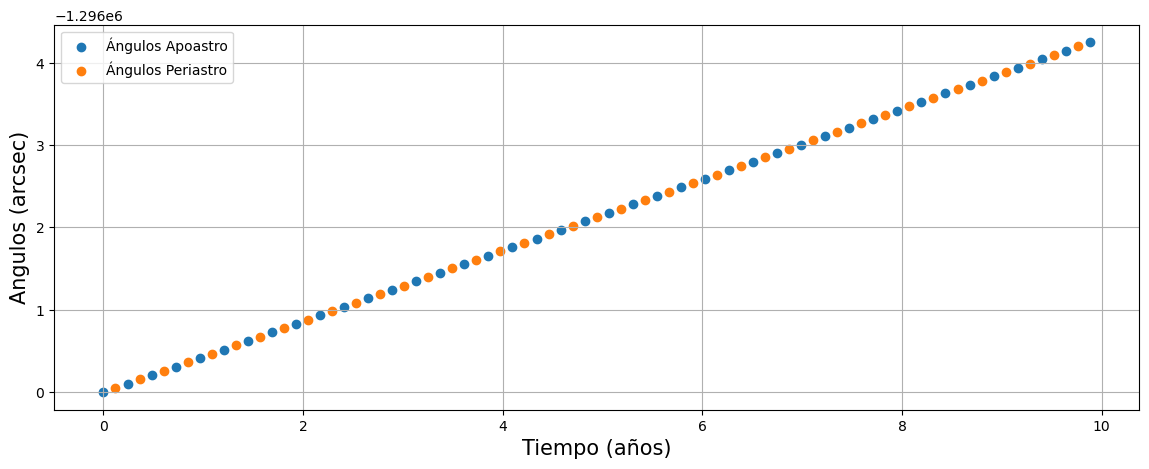

In [120]:
#Grafica angulo vs tiempo

##Apoastro

plt.scatter(t_apoastro,apoastro_arcsec,label="Ángulos Apoastro")
plt.scatter(t_periastro,periastro_arcsec,label="Ángulos Periastro")
plt.xlabel("Tiempo (años)")
plt.ylabel("Angulos (arcsec)")
plt.grid()
plt.legend()


In [122]:
# Pendiente
coefficients=np.polyfit(t_periastro,periastro_arcsec,1)
coefficients[0]

0.4298569405577269

La gráfica del ángulo de periastro de la órbita de Mercurio en función del tiempo muestra una pendiente lineal sin ruido, conforme a lo esperado. Este valor coincide exactamente con el valor de referencia observado para la precesión anómala de Mercurio de 42.9799 arcsegundos por siglo. Este resultado demuestra que los valores obtenidos al resolver la ecuación diferencial sobre la fuerza producida por el Sol a distancias cercanas utilizando la función solve_ivp son consistentes con las observaciones empíricas, lo que valida el modelo matemático utilizado con las observaciones.

## 3) Cuantización de la energía

In [126]:
def ecuacion_schrodinger(x,y,E):
  f,d_f=y
  return ([d_f,(x**2*f)-2*E*f])

In [130]:
# Configuración del rango de energías y condiciones iniciales
Energias = np.arange(0, 10, 0.001)

def encontrar_energias(Energias,ecuacion,condiciones):
  condicion = 10
  soluciones=[]
  energias=[]
  for E in Energias:
      sol = solve_ivp(ecuacion_schrodinger, t_span=(0, 6), y0=condiciones, args=[E],max_step=1e-2)
      if abs(sol.y[0, -1]) < condicion and abs(sol.y[1, -1]) < condicion:
          soluciones.append(sol.y[0])
          energias.append(E)
          if len(energias) >= 5:
              break
  return energias,soluciones


In [131]:
## Energias simetricas:
energias_forma_simetrica,solucion_simetrica=encontrar_energias(Energias,ecuacion_schrodinger,[1,0])
energias_forma_simetrica

[0.5, 2.5, 4.5, 6.4990000000000006, 6.5]

In [132]:
## Energias antisimetricas:Ç
energias_forma_antisimetrica,solucion_antisimetrica=encontrar_energias(Energias,ecuacion_schrodinger,[0,1])
energias_forma_antisimetrica

[1.5, 3.5, 5.4990000000000006, 5.5, 5.501]

In [142]:
## Comprobar las energias
def energias_probar(energias,soluciones):
  fig, ax = plt.subplots()
  for i,E in enumerate(energias):
    plt.plot(soluciones[i],label=f"energia:{E:.3f}")
  plt.legend()
  plt.grid()


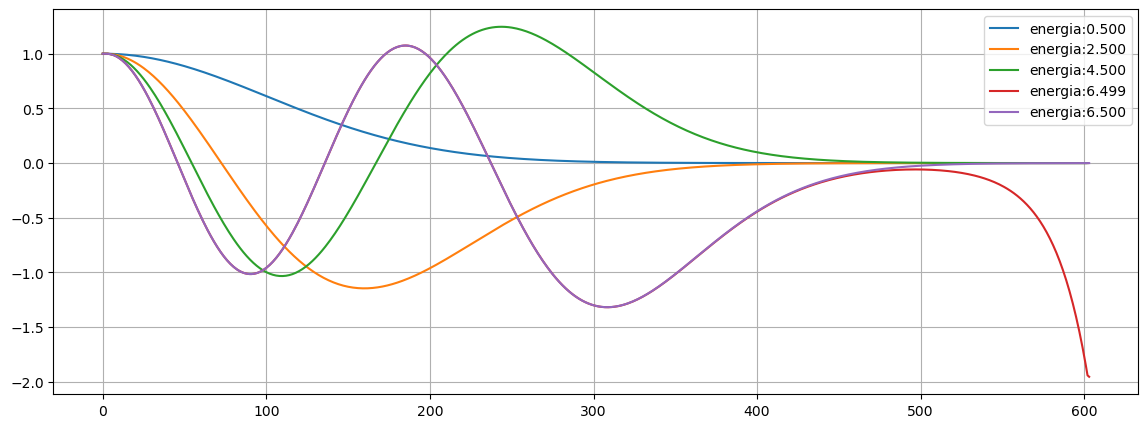

In [140]:
energias_probar(energias_forma_simetrica,solucion_simetrica)

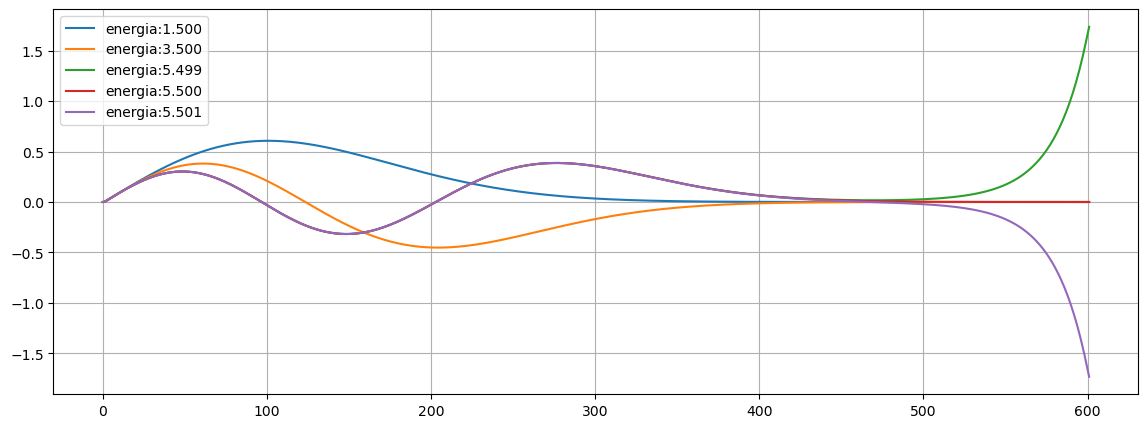

In [141]:
energias_probar(energias_forma_antisimetrica,solucion_antisimetrica)